### 一、前期工作

#### 设置GPU

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, datasets, models
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
gpus = tf.config.list_physical_devices("GPU")
if gpus:
    gpu0 = gpus[0]
    tf.config.experimental.set_memory_growth(gpu0, True)
    tf.config.set_visible_devices([gpu0],"GPU")

#### 导入数据

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

#### 归一化

In [4]:
# 将像素的值标准化至0到1的区间内。
train_images, test_images = train_images / 255.0, test_images / 255.0
train_images.shape,test_images.shape,train_labels.shape,test_labels.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

#### 可视化

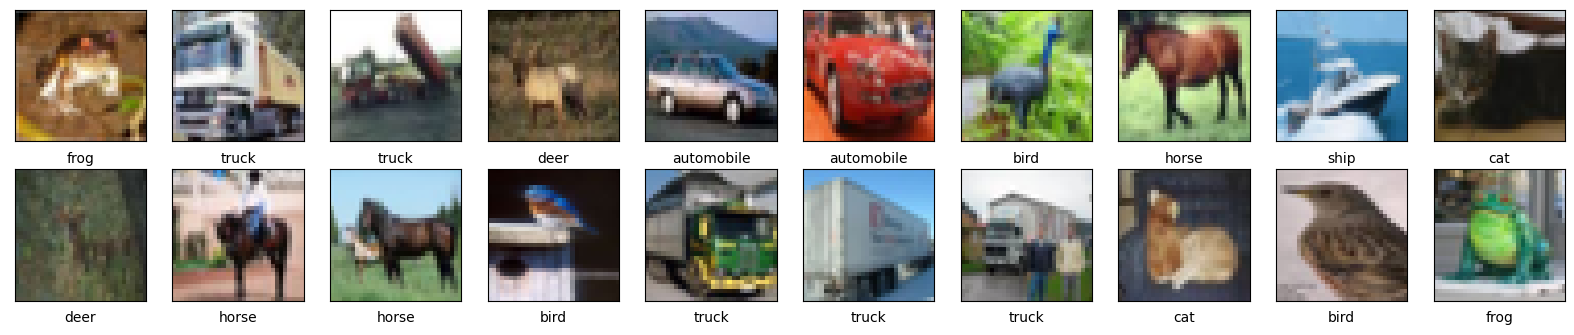

In [5]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(20,10))
for i in range(20):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

#### 构建CNN网络

In [6]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)), #卷积层1，卷积核3*3
    layers.MaxPooling2D((2, 2)),                   #池化层1，2*2采样
    layers.Conv2D(64, (3, 3), activation='relu'),  #卷积层2，卷积核3*3
    layers.MaxPooling2D((2, 2)),                   #池化层2，2*2采样
    layers.Conv2D(64, (3, 3), activation='relu'),  #卷积层3，卷积核3*3

    layers.Flatten(),                      #Flatten层，连接卷积层与全连接层
    layers.Dense(64, activation='relu'),   #全连接层，特征进一步提取
    layers.Dense(10)                       #输出层，输出预期结果
])

model.summary()  # 打印网络结构

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

### 三、编译模型

In [7]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### 训练模型

In [8]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 13s 6ms/step - loss: 1.5127 - accuracy: 0.4484 - val_loss: 1.2373 - val_accuracy: 0.5478
Epoch 2/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.1467 - accuracy: 0.5949 - val_loss: 1.0832 - val_accuracy: 0.6164
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9985 - accuracy: 0.6487 - val_loss: 0.9680 - val_accuracy: 0.6547
Epoch 4/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8986 - accuracy: 0.6851 - val_loss: 0.9387 - val_accuracy: 0.6729
Epoch 5/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8263 - accuracy: 0.7112 - val_loss: 1.0055 - val_accuracy: 0.6625
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7704 - accuracy: 0.7300 - val_loss: 0.8770 - val_accuracy: 0.6945
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7191 - accuracy: 0.7483 - val_loss: 0.8777 - val_accur

#### 五、预测

ship


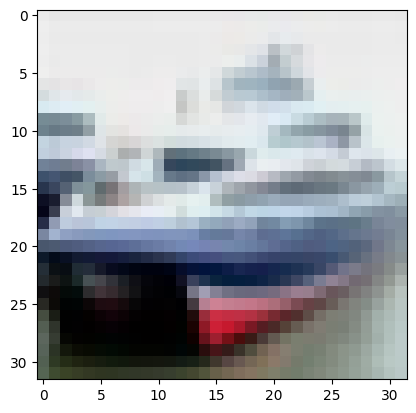

In [9]:
plt.imshow(test_images[1])
pre = model.predict(test_images)
print(class_names[np.argmax(pre[1])])

#### 模型评估

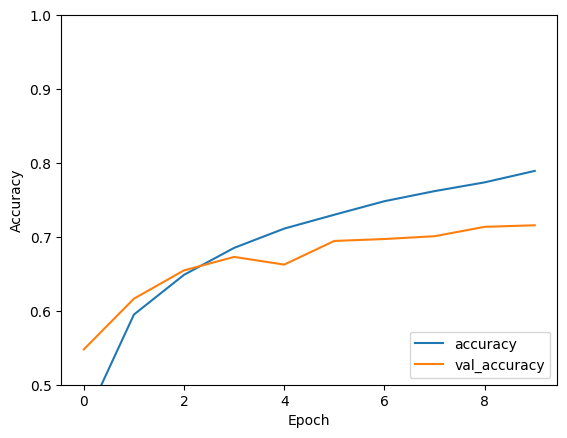

313/313 - 1s - loss: 0.8599 - accuracy: 0.7157


In [10]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [11]:
print(test_acc)

0.7156999707221985
